In [1]:
import igraph as ig
import geopandas as gpd
import itertools as it

from eptnr.data_generation.utils.synthetic_data_generation import (
    graph_walking_edges_generation,
    set_eptnr_vertices,
    graph_edge_entry,
)
from eptnr.data_generation.utils.eptnr_vertex import EPTNRVertex
from eptnr.constants.igraph_edge_types import IGraphEdgeTypes
from eptnr.constants.igraph_vertex_types import IGraphVertexTypes
from eptnr.constants.igraph_colors import IGraphColors
from eptnr.data_generation.utils.synthetic_speeds import SyntheticTravelSpeeds

# Graph
<img src="/home/rico/Documents/thesis/paper/figures/sample_setup_ptn_map.png" width=400 height=400 />

In [2]:
g = ig.Graph(directed=True)

In [3]:
rc_vertices = [
    # Residential Centers
    EPTNRVertex(3.5, 3.5, IGraphColors.RED, IGraphVertexTypes.RC_NODE),
    EPTNRVertex(2.5, 3.5, IGraphColors.RED, IGraphVertexTypes.RC_NODE),
    EPTNRVertex(3.5, 2.5, IGraphColors.RED, IGraphVertexTypes.RC_NODE),
    EPTNRVertex(0.5, 1.5, IGraphColors.PURPLE, IGraphVertexTypes.RC_NODE),
    EPTNRVertex(0.5, 0.5, IGraphColors.PURPLE, IGraphVertexTypes.RC_NODE),
    EPTNRVertex(1.5, 0.5, IGraphColors.PURPLE, IGraphVertexTypes.RC_NODE),
]
pt_vertices = [
    # Public Transport Nodes
    EPTNRVertex(1, 1, IGraphColors.BLUE, IGraphVertexTypes.PT_NODE),
    EPTNRVertex(2, 2, IGraphColors.BLUE, IGraphVertexTypes.PT_NODE),
    EPTNRVertex(3, 1, IGraphColors.BLUE, IGraphVertexTypes.PT_NODE),
    EPTNRVertex(3.5, 3, IGraphColors.BLUE, IGraphVertexTypes.PT_NODE),
    EPTNRVertex(3, 3, IGraphColors.BLUE, IGraphVertexTypes.PT_NODE),
    EPTNRVertex(3, 3.5, IGraphColors.BLUE, IGraphVertexTypes.PT_NODE),
]
poi_vertices = [
    # Point of Interest Nodes
    EPTNRVertex(2.75, 2.75, IGraphColors.GREEN, IGraphVertexTypes.POI_NODE),
    EPTNRVertex(2.75, 3.25, IGraphColors.GREEN, IGraphVertexTypes.POI_NODE),
    EPTNRVertex(3.25, 2.75, IGraphColors.GREEN, IGraphVertexTypes.POI_NODE),
]

vertices = rc_vertices +  pt_vertices + poi_vertices
set_eptnr_vertices(graph=g, vertices=vertices)

## PTN Edges

### Walking

In [4]:
graph_walking_edges_generation(graph=g, vertices=vertices)


### PT

In [5]:
E_BUS = [
    (pt_vertices[0],pt_vertices[1]),  # Bus_line_1
    (pt_vertices[1],pt_vertices[0]),  # Bus_line_1
    (pt_vertices[1],pt_vertices[4]),  # Bus_line_2
    (pt_vertices[4],pt_vertices[1]),  # Bus_line_2
    (pt_vertices[4],pt_vertices[5]),  # Bus_line_3
    (pt_vertices[5],pt_vertices[4]),  # Bus_line_3
    (pt_vertices[3],pt_vertices[4]),  # Bus_line_4
    (pt_vertices[4],pt_vertices[3]),  # Bus_line_4
]
names = list(it.repeat(f'Bus_line_1',2)) +\
        list(it.repeat(f'Bus_line_2',2)) +\
        list(it.repeat(f'Bus_line_3',2)) +\
        list(it.repeat(f'Bus_line_4',2))

graph_edge_entry(
    graph=g,
    edges=E_BUS,
    names=names,
    speed=SyntheticTravelSpeeds.BUS_SPEED,
    edge_type=IGraphEdgeTypes.BUS,
    color=IGraphColors.PINK,
    round_to_decimals=2,
)


In [6]:
E_RAIL = [
    (pt_vertices[0],pt_vertices[4]),  # Train_line_1
    (pt_vertices[4],pt_vertices[2]),  # Train_line_1
    (pt_vertices[2],pt_vertices[0]),  # Train_line_1
]
names = list(it.repeat(f'Train_line_1',3))

graph_edge_entry(
    graph=g,
    edges=E_RAIL,
    names=names,
    speed=SyntheticTravelSpeeds.RAIL_SPEED,
    edge_type=IGraphEdgeTypes.RAIL,
    color=IGraphColors.BLUE,
    round_to_decimals=2,
)

In [7]:
g.es['active'] = 1

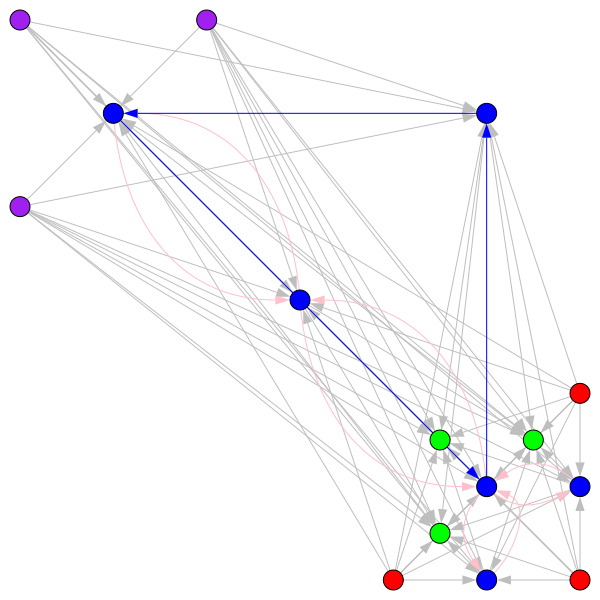

In [8]:
ig.plot(g)

In [9]:
g.write_picklez('../datasets/synthetic_3/graph.picklez')

# Census Data

In [10]:
data = {
    'neighborhood': [rcv.name for rcv in rc_vertices],
    'n_inh': [1000,1000,1000,1200,800,1000],
    'n_purple': [100, 200, 200, 1000, 600, 1000],
    'n_red': [900, 800, 800, 200, 200, 0],
    'res_centroids': gpd.points_from_xy([rcv.x for rcv in rc_vertices], [rcv.y for rcv in rc_vertices])
}

gdf = gpd.GeoDataFrame(data, geometry='res_centroids')
gdf

,neighborhood,n_inh,n_purple,n_red,res_centroids
0,RC0,1000,100,900,POINT (3.50000 3.50000)
1,RC1,1000,200,800,POINT (2.50000 3.50000)
2,RC2,1000,200,800,POINT (3.50000 2.50000)
3,RC3,1200,1000,200,POINT (0.50000 1.50000)
4,RC4,800,600,200,POINT (0.50000 0.50000)
5,RC5,1000,1000,0,POINT (1.50000 0.50000)


In [11]:
gdf.to_file('../datasets/synthetic_3/census_data.geojson', driver='GeoJSON')